In [2]:
import os, cv2, glob
images=[]
labels=[]
dict_labels={"cats":0, "dogs":1}
for folder in glob.glob("./data/DogsCats/training_set/*"):
    print(folder,"圖片讀取中..")
    for filename in os.listdir(folder):
        label=folder.split("/")[-1]
#         print(label)
        try:
            img=cv2.imread(os.path.join(folder,filename))
            img=cv2.resize(img,dsize=(80,80))
            if img is not None:
                images.append(img)
                labels.append(dict_labels[label])
        except:
            pass

print("圖片讀取完畢!")  





./data/DogsCats/training_set/dogs 圖片讀取中..
./data/DogsCats/training_set/cats 圖片讀取中..
圖片讀取完畢!


# 查看圖片和標籤的筆數

In [3]:
print("圖片數量：{}".format(len(images)))
print("標籤數量：{}".format(len(labels)))



圖片數量：8005
標籤數量：8005


# 資料預處理
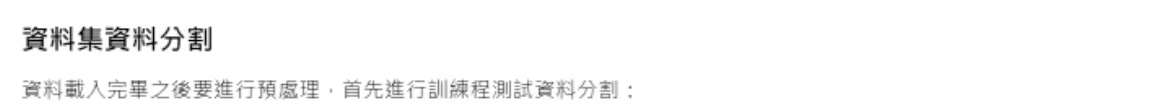

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import np_utils

train_feature,test_feature,train_label,test_label = \
train_test_split(images, labels, test_size=0.2)

train_feature=np.array(train_feature)
test_feature=np.array(test_feature)
train_label=np.array(train_label)
test_label=np.array(test_label)

Using TensorFlow backend.


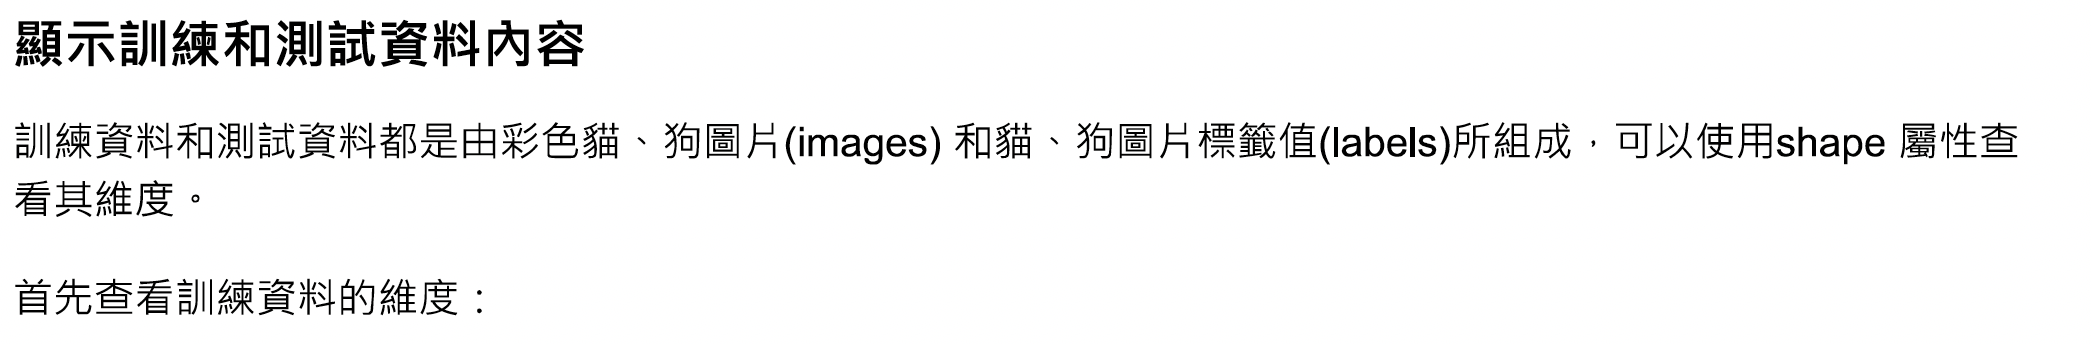

In [5]:
print('訓練資料維度:{}'.format(train_feature.shape))
print('訓練標籤維度:{}'.format(train_label.shape))
print('測試資料維度:{}'.format(test_feature.shape))
print('訓練標籤維度:{}'.format(test_label.shape))

訓練資料維度:(6404, 80, 80, 3)
訓練標籤維度:(6404,)
測試資料維度:(1601, 80, 80, 3)
訓練標籤維度:(1601,)


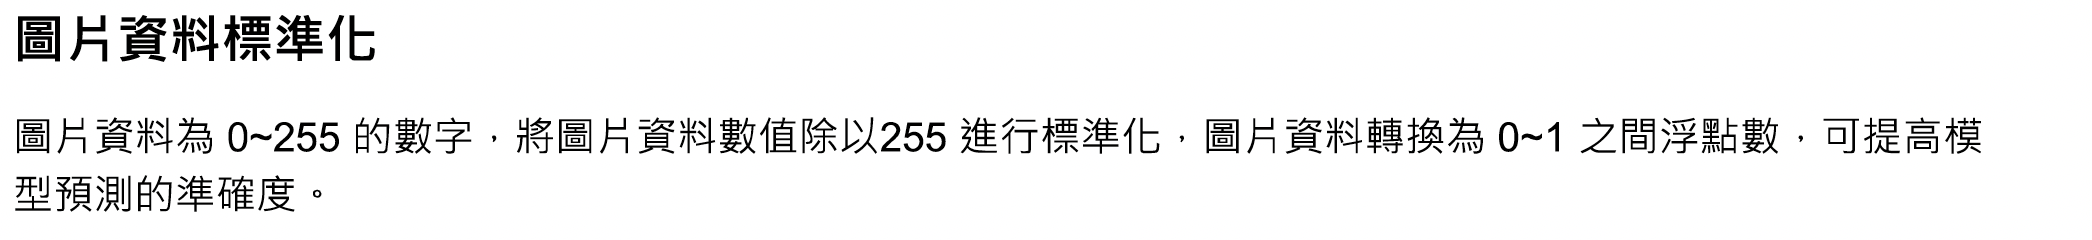

In [6]:
train_feature=train_feature/255
test_feature=test_feature/255

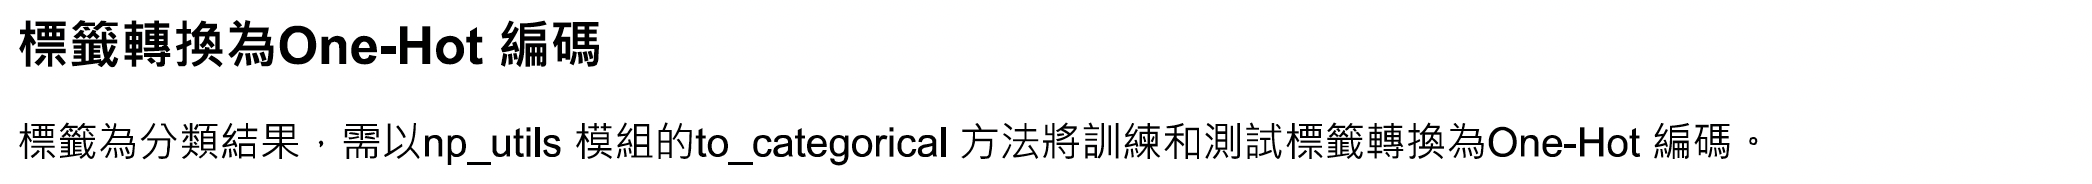

In [7]:
#One-Hot編碼
from keras.utils import to_categorical


train_label=to_categorical(train_label)
test_label=to_categorical(test_label)

# 建立卷積神經網路模型

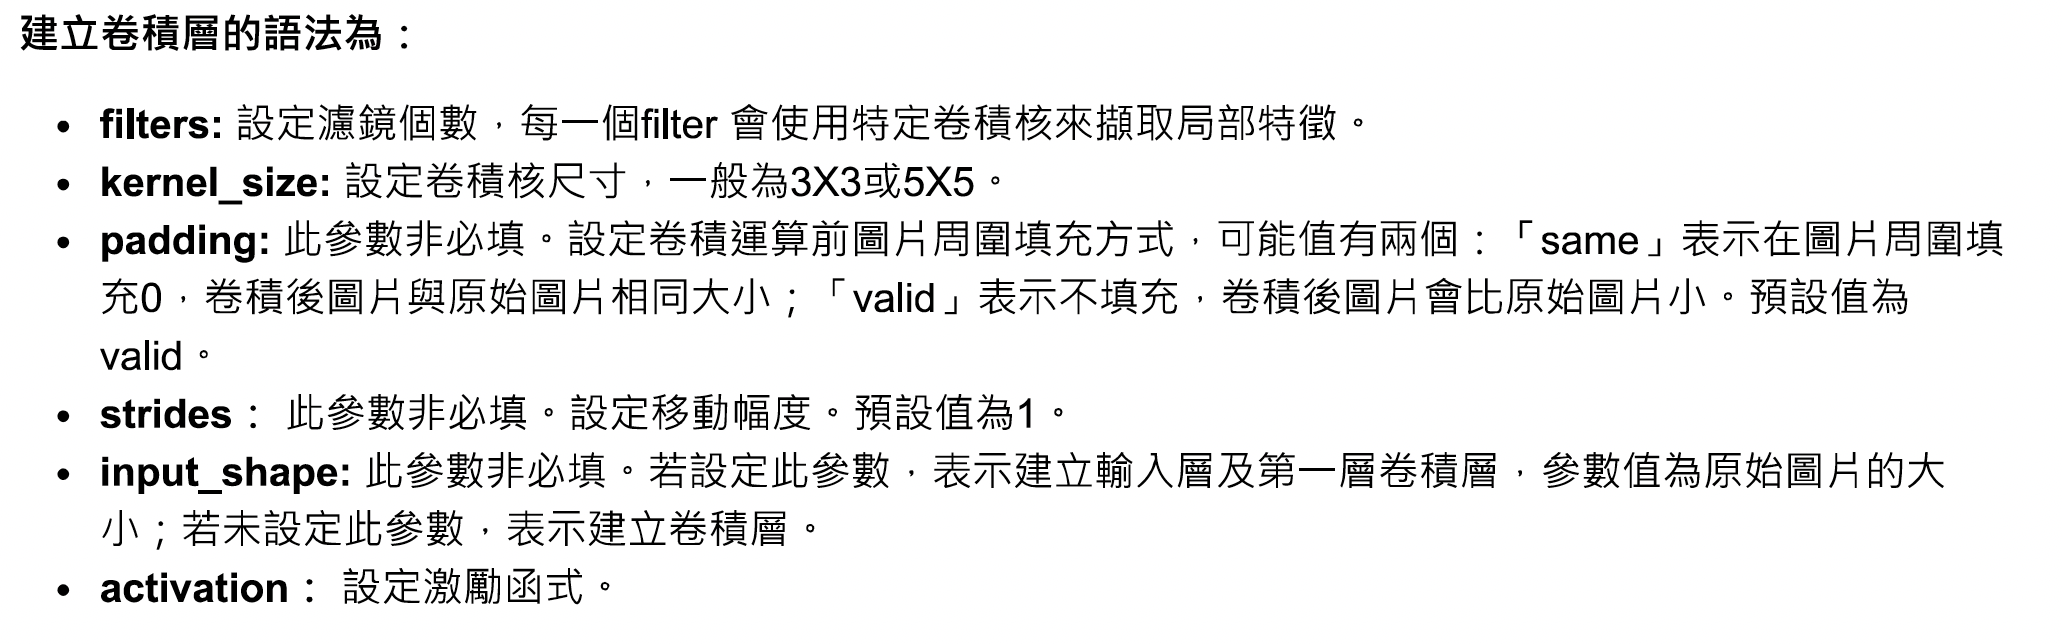

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
model = Sequential()

model.add(Conv2D(filters=8,kernel_size=(5,5), padding='same',
                input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=16,kernel_size=(5,5), padding='same',
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32,kernel_size=(5,5), padding='same',
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(units=128,activation = 'relu'))

model.add(Dense(units=2,activation = 'softmax'))

model.summary() 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 80, 80, 8)         608       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 40, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 16)        3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 20, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 32)       

2022-08-30 14:28:51.247661: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-30 14:28:51.250306: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [9]:
#編譯模型
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
             metrics = ['accuracy'])
#訓練模型
model.fit(x=train_feature, y=train_label, validation_split = 0.2,
                   epochs = 30, batch_size = 200, verbose = 2)

Train on 5123 samples, validate on 1281 samples
Epoch 1/30
 - 19s - loss: 0.7039 - accuracy: 0.5104 - val_loss: 0.6912 - val_accuracy: 0.4957
Epoch 2/30
 - 16s - loss: 0.6799 - accuracy: 0.5721 - val_loss: 0.6657 - val_accuracy: 0.5902
Epoch 3/30
 - 20s - loss: 0.6693 - accuracy: 0.5807 - val_loss: 0.6641 - val_accuracy: 0.6050
Epoch 4/30
 - 21s - loss: 0.6530 - accuracy: 0.6096 - val_loss: 0.6323 - val_accuracy: 0.6386
Epoch 5/30
 - 18s - loss: 0.6236 - accuracy: 0.6502 - val_loss: 0.6118 - val_accuracy: 0.6698
Epoch 6/30
 - 19s - loss: 0.5988 - accuracy: 0.6760 - val_loss: 0.5811 - val_accuracy: 0.6729
Epoch 7/30
 - 19s - loss: 0.5945 - accuracy: 0.6789 - val_loss: 0.5790 - val_accuracy: 0.6831
Epoch 8/30
 - 19s - loss: 0.5722 - accuracy: 0.7000 - val_loss: 0.5626 - val_accuracy: 0.7291
Epoch 9/30
 - 19s - loss: 0.5549 - accuracy: 0.7121 - val_loss: 0.5384 - val_accuracy: 0.7369
Epoch 10/30
 - 18s - loss: 0.5288 - accuracy: 0.7314 - val_loss: 0.5354 - val_accuracy: 0.7260
Epoch 11/30

In [10]:
scores = model.evaluate(test_feature, test_label)
print('\n準確率=',scores[1])
model.save('./data/model/catdog_model.h5')

1601/1601 [==============================] - 2s 1ms/step

準確率= 0.7788881659507751


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import glob,cv2
%matplotlib inline

In [12]:
def show_images_labels_predictions(images, labels,
                                    predictions,start_id, num=10):
    plt.figure(figsize=(12,14))
    if num>25: num=25
    for i in range(0, num):
        
        ax=plt.subplot(5,5,1+i)
        ax. imshow(images[start_id])
        if(len(predictions) > 0 ) :
            title= 'ai =' + str(predictions[start_id])
            title+= ('(o)' if predictions[start_id]==\
                    labels[start_id] else '(x)')
            title += '\nlabel =' +str(labels[start_id])
        else :
            title = 'label =' + str(labels[start_id])
        ax.set_title(title,fontsize=12)
        ax.set_xticks([]);ax.set_yticks([])
        start_id+=1
    plt.show()

In [13]:
files = glob.glob("./data/Dogs-Cats/data/*.jpg" )
test_feature=[]
test_label=[]
dict_labels={"Cat":0, "Dog":1}
for file in files:
    img=cv2.imread(file)
#     print(file)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, dsize=(80,80))
    test_feature. append(img)
    label=file[22:25]
#     print(label)
    test_label.append(dict_labels[label])


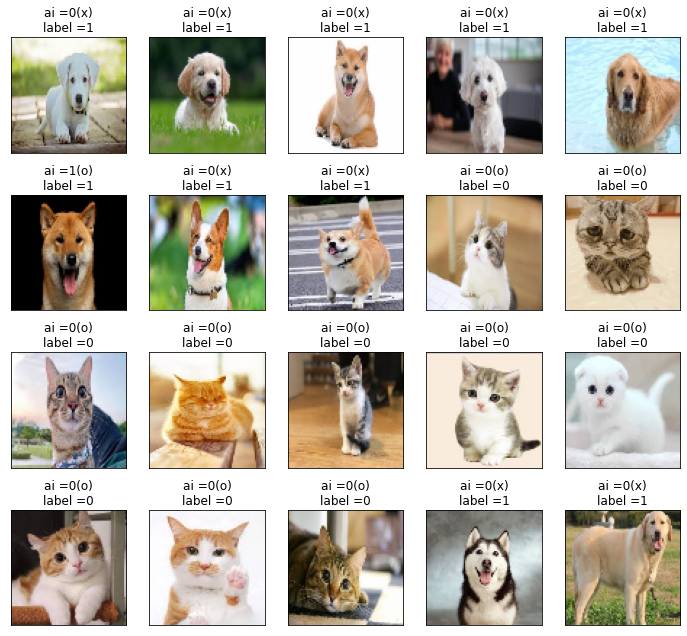

In [14]:
test_feature=np.array(test_feature)
test_label=np.array(test_label)
test_feature_vector=test_feature.reshape(len(test_feature),80,80,3)
test_feature_n = test_feature_vector/255

model = Sequential()

model.add(Conv2D(filters=8,kernel_size=(5,5), padding='same',
                input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=16,kernel_size=(5,5), padding='same',
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32,kernel_size=(5,5), padding='same',
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(units=128,activation = 'relu'))

model.add(Dense(units=2,activation = 'softmax'))

prediction=model.predict(test_feature_n)
prediction=np.argmax(prediction,axis=1)
show_images_labels_predictions(test_feature,test_label,
                                prediction,0,len(test_feature))
